## Purpose: Provide a pass/fail test of a radio design based on 
Last significant edits: 7/13/16

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import sys
sys.path.insert(0,'../Coding')
import RadioSimulator

In [9]:
reload(RadioSimulator)
mySim = RadioSimulator.RadioSimulator(radioFile = '../Data/PowerMEMS_Sample_Data_em_20160928.csv')

In [ ]:
## Edit these variables
initVariables = {'TEGserial':0.1, 'TEGparallel':0.1, 'batts':25.65135, 'caps':0.467, 'SOC':0.4086123, 'V_b':0.4, 'V_c':2.7}

In [5]:

## This runs the simulation 
(feasible,optimalDf,failStep) = mySim.simulate(initVariables, stopOnError=False, returnDf=True)

cost = (initVariables['TEGserial']*initVariables['TEGparallel']+initVariables['batts']+initVariables['caps'])

print("Is this design with size %s feasible? %s"% (cost, feasible))
if not(feasible):
    print("Failed on step %s of %s steps"%(failStep, optimalDf.index[-1]))

Failed on step 43
Is this design with size 58 feasible? False
Failed on step 43 of 323 steps


In [14]:
optimalDf['I_t'].max()

0.00044904380209052479

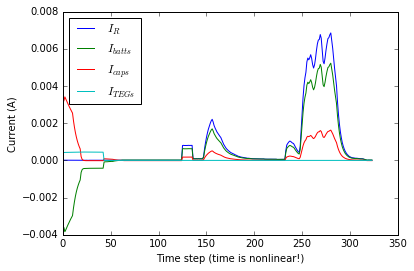

In [21]:
## Plotting the results

plt.plot(optimalDf['I_r'],label="$I_R$")
plt.plot(optimalDf['I_b'] * initVariables['batts'],label='$I_{batts}$')
plt.plot(optimalDf['I_c'] * initVariables['caps'],label='$I_{caps}$')
plt.plot(optimalDf['I_t'] * initVariables['TEGparallel'],label='$I_{TEGs}$')
plt.ylabel('Current (A)')
plt.xlabel('Time step (time is nonlinear!)')
plt.legend(loc='best')

In [13]:
## Compute Cost
initVariables = {'TEGserial':0.1001, 'TEGparallel':0.01, 'batts':2, 'caps':3.337, 'SOC':0.25286, 'V_b':0, 'V_c':2.10641088}
cost = mySim.computeCost(initVariables)
print cost

7115.07650476


## Observations 9/29/16
For the 1-hour simulation, the TEGs are binding against the lower limit, while there are far more batteries than expected. It appears that the system may just be draining the batteries slightly over the course of the cycle- 